# <CENTER> REGRESIÓN LOGÍSTICA

<center>  <img src="https://cdn-images-1.medium.com/max/1000/1*OV8OjU1ll5QDxD0Yet23Nw.png" width="400"> <center> 
<i>Imagen referencial "Churn"

#### EMPLOYEE CHURN PREDICTION:
Para este proyecto se empleo la data de Kaggle: https://www.kaggle.com/c/employee-churn-prediction/overview <p>

Se evaluará un dataset compuesto por datos de recursos humanos. El objetivo es construir un modelo de regresión logística que prediga si es probable que un empleado deje su trabajo en función de las características del conjunto de datos. 


###### RESUMEN DATASET:
<b><u>Predictoras:</u></b> <p>
<b> ID: </b>número de identificación anónimo para cada empleado.<br>
<b>satisfaction  </b>- nivel de satisfacción del empleado (rango 0 - 1)<br>
<b>last_evaluation </b>- Puntuación de la última evaluación (rango 0 - 1)<br>
<b>number_project </b> - Número de proyectos asignados<br>
<b>average_monthly_hour</b> - Horas mensuales promedio trabajadas<br>
<b>time_spend_company</b> - Tiempo empleado en la empresa<br>
<b>Work_accident</b> - (1 = Yes, 0 = No) - Si tuvieron un accidente de trabajo<br>
<b>promotion_last_5year </b>- (1 = Yes, 0 = No) - Si han tenido una promoción en los últimos 5 años<br>
<b>Departments </b>- nombre del departamento de trabajo del empleado<br>
<b>salary </b>- categoría de salario (low-medium-high)<p>
   
<b><u>Target:</u></b> <p>
<b>left </b>: si el empleado dejó o no la empresa (1 = Sí, 0 = No)<br>
    

In [1]:
#import modules
import numpy as np
import pandas as pd # dataframes
import matplotlib.pyplot as plt # Graficos
import seaborn as sns # graficos
% matplotlib inline

In [2]:
#Codigo para google colab
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\n"

In [6]:
#Para Colab
#file="/content/gdrive/My Drive/HR_comma_sep.csv"
#----------------------------------------------------------------------------------------
#Para directorio local
file="../Logistica/HR_comma_sep.csv"

In [7]:
data=pd.read_csv(file)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#Verificar nulos y tipo de datos en dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#Target: el empleado dejó o no la empresa (1 = Sí, 0 = No)
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

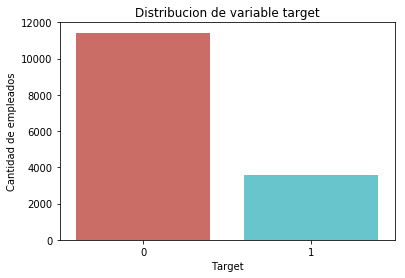

0.7619174611640777 0.2380825388359224


In [11]:
sns.countplot(x='left',data=data,palette='hls')
plt.title('Distribucion de variable target')
plt.xlabel('Target')
plt.ylabel('Cantidad de empleados')
plt.show()
print(11428/14999,3571/14999)

In [12]:
list(data)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments ',
 'salary']

In [13]:
#'average_monthly_hours', last_evaluation, satisfaction, ID no fueron considerados
features_cat=['number_project','time_spend_company',
          'Work_accident', 'promotion_last_5years',
          'Departments ','salary']


### Analisis Univariado


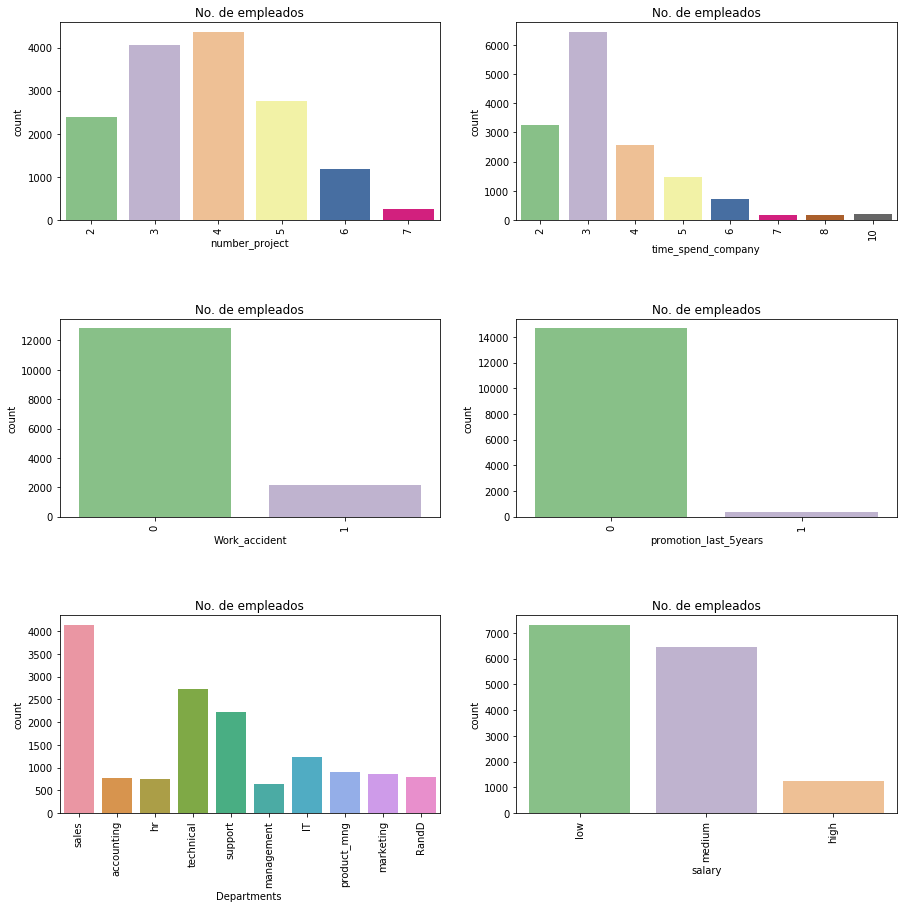

In [14]:
#Analisis univariado
fig=plt.subplots(figsize=(15,20))
#enumerate: (0, ''number_project'), (1, 'time_spend_company'), etc
for i, j in enumerate(features_cat):
    plt.subplot(4, 2, i+1)#fila, columna, num
    plt.subplots_adjust(hspace = 0.5)#espacio entre plots
    sns.set_palette("Accent")
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)#ubicacion de labels(rotacion=90%)
    plt.title("No. de empleados")

### Analisis Bivariado

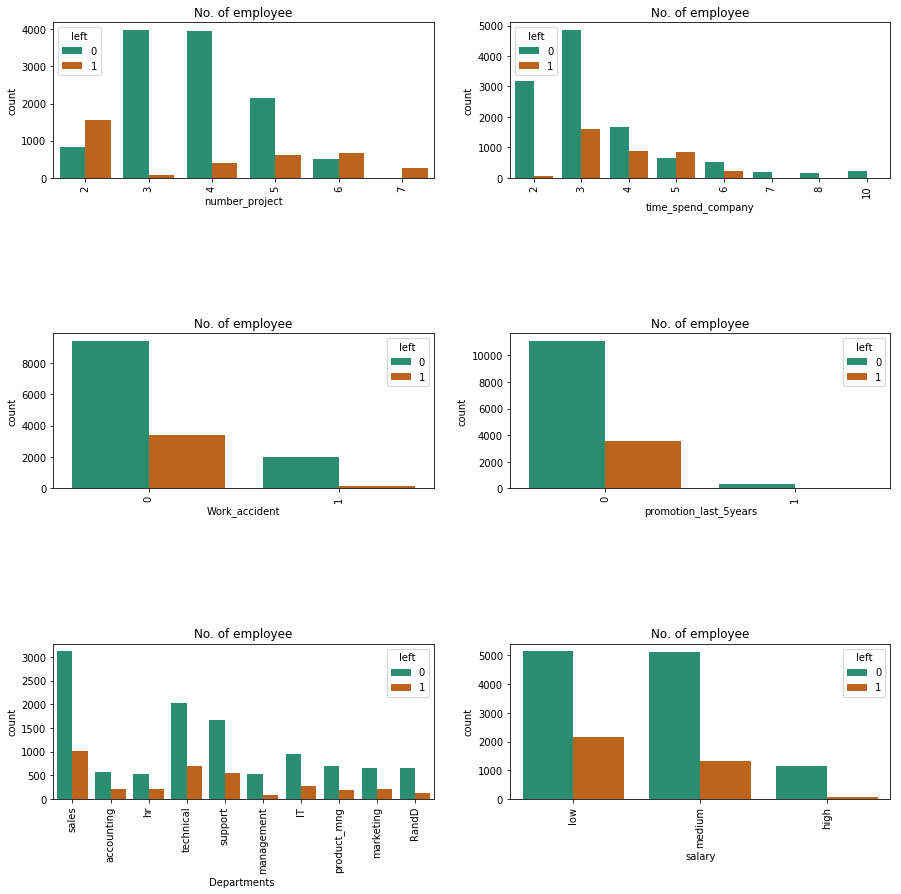

In [12]:
#analisis bivariado
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features_cat):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.set_palette("Dark2")
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

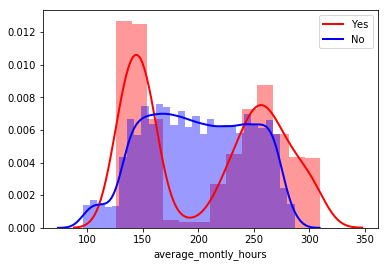

In [13]:
#VARIABLE PROMEDIO DE HORAS MENSUALES TRABAJADAS
#--------------------------------------------------------------
data['left'].replace([0,1],['No','Yes'], inplace=True)
#sns.distplot(data[data['left']=='Yes'].average_montly_hours.dropna(), bins='auto', color="r",label="Yes")
sns.distplot(data[data['left']=='Yes'].average_montly_hours.dropna(),kde_kws={"color": "r", "lw": 2,"label": "Yes"}, hist_kws={"color": "r"})
sns.distplot(data[data['left']=='No'].average_montly_hours.dropna(), kde_kws={"color": "b", "lw": 2, "label": "No"}, hist_kws={"color": "b"})


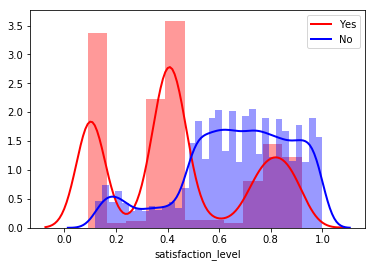

In [14]:
#VARIABLE NIVEL DE SATISFACCIÓN
#--------------------------------------------------------------
sns.distplot(data[data['left']=='Yes'].satisfaction_level.dropna(),kde_kws={"color": "r", "lw": 2,"label": "Yes"}, hist_kws={"color": "r"})
sns.distplot(data[data['left']=='No'].satisfaction_level.dropna(), kde_kws={"color": "b", "lw": 2, "label": "No"}, hist_kws={"color": "b"})

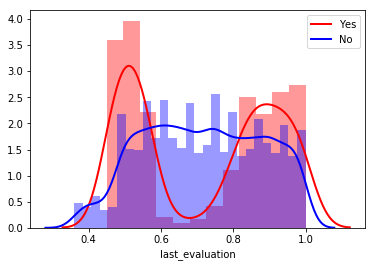

In [15]:
#VARIABLE ULTIMA EVALUACION (PUNTUACION)
#--------------------------------------------------------------
sns.distplot(data[data['left']=='Yes'].last_evaluation.dropna(),kde_kws={"color": "r", "lw": 2,"label": "Yes"}, hist_kws={"color": "r"})
sns.distplot(data[data['left']=='No'].last_evaluation.dropna(), kde_kws={"color": "b", "lw": 2, "label": "No"}, hist_kws={"color": "b"})

### Resumen de visualización:

Las siguientes características son las que más influyen en una persona para abandonar la empresa:

<b>Promociones: </b> los empleados tienen muchas más probabilidades de renunciar a su trabajo si no han recibido una promoción en los últimos 5 años. <p>
<b>Tiempo con la compañía </b>: La mayoría de empleados renunciaron a su trabajo alrededor de los tres años. Sin embargo, cabe resaltarque a partir de los 6 años, se vuelve muy poco probable que el empleado se vaya.<p>
<b>Número de proyectos </b>: Los empleados con 3-5 proyectos tienen menos probabilidades de abandonar la empresa. El empleado con menos y más número de proyectos es probable que se vaya.<p>
<b>Salario </b>: la mayoría de los empleados que renunciaron entre los grupos de salario medio o bajo.

## **PRE Procesamiento**

In [16]:
# Importar LabelEncoder
from sklearn import preprocessing
#crear labelEncoder
le = preprocessing.LabelEncoder()
# Convertir datos string a numericos
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])
data['left'].replace(['No','Yes'],[0,1], inplace=True)

## Construcción del modelo

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [19]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
# 70% train and 30% test

In [21]:
print('Son',np.size(X_train['salary']),'datos en train y',np.size(y_test),'en el test')

Son 10499 datos en train y 4500 en el test


In [22]:
pd.crosstab(y_test,'count')

col_0,count
left,
0,3428
1,1072


In [23]:
# proporcion de 1 en el dataset entero : 0.2380825388359224
1072/(3428+1072)

0.23822222222222222

In [24]:
pd.crosstab(y_train,'count')

col_0,count
left,
0,8000
1,2499


In [25]:
# proporcion de 1 en el dataset entero : 0.2380825388359224
2499/(8000+2499)

0.23802266882560244

**Aplicacion de Modelo**

In [26]:
# importar el modulo
from sklearn.linear_model import LogisticRegression

# inicializar el modelo (parametros en default)
logreg = LogisticRegression()

#usar el modelo con la data de entrenamiento
logreg.fit(X_train,y_train)

#Usar modelo en el test
y_pred=logreg.predict(X_test)

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3166  262]
 [ 817  255]]



<img src="https://educationalresearchtechniques.files.wordpress.com/2016/08/13.png?w=415" width="300">
<center> <i>Imagen referencial matriz de confusión

Text(0.5,15,'Predicted label')

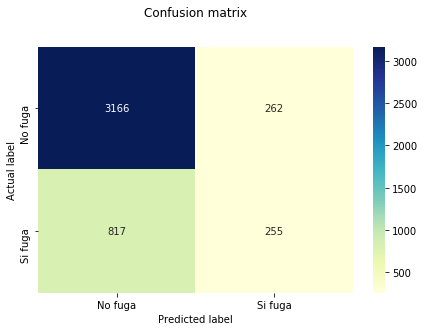

In [28]:
class_names=['No fuga','Si fuga'] # clases
# create mapa de calor
sns.heatmap(confusion_matrix,xticklabels=class_names,yticklabels=class_names, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Precisión:",metrics.accuracy_score(y_test, y_pred))
print("Especificidad:",3166/(3166+262))
#print("Especificidad:",metrics.precision_score(y_test, y_pred))
print("Sensitividad:",metrics.recall_score(y_test, y_pred))

Precisión: 0.760222222222
Especificidad: 0.9235705950991832
Sensitividad: 0.237873134328


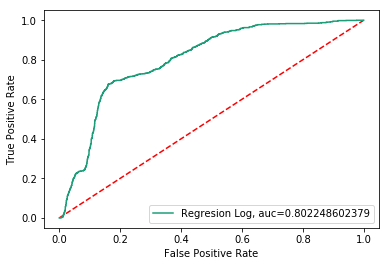

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,label="Regresion Log, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

 # <center>ESTANDARIZANDO Y BALANCEANDO LA DATA

In [31]:
data2=pd.read_csv(file)
data2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
data2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

## **PRE Procesamiento**

In [33]:
#Tipos de variables:
#Target
target_col=['left']
#Numericas
num_cols=['satisfaction_level','last_evaluation','average_montly_hours']
#Categoricas binarias
cat_bin_cols=['Work_accident', 'promotion_last_5years']
#Categoricas multiples
cat_mul_cols=['number_project','time_spend_company', 'Departments ', 'salary']


In [34]:
# Importar LabelEncoder
from sklearn import preprocessing
#crear labelEncoder
le = preprocessing.LabelEncoder()
# Convertir datos string a numericos
data2['salary']=le.fit_transform(data2['salary'])
data2['Departments ']=le.fit_transform(data2['Departments '])
data2[['Departments ','salary']].head()

,Departments,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


### **Estandarizacion**

In [35]:
#Importar StandardScaler
from sklearn.preprocessing import StandardScaler

<center>  <img src="https://cdn-images-1.medium.com/max/1600/0*PXGPVYIxyI_IEHP7." width="300"> <center>  
<i>"Formula de estandarización"

In [36]:
scaler = StandardScaler()
Standarized_data=scaler.fit_transform(data2[num_cols])
Standarized_data=pd.DataFrame(Standarized_data,columns=num_cols)

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
Standarized_data.head()

,satisfaction_level,last_evaluation,average_montly_hours
0,-0.936495,-1.087275,-0.882040
1,0.752814,0.840707,1.220423
2,-2.022479,0.957554,1.420657
3,0.431041,0.899131,0.439508
4,-0.976716,-1.145699,-0.841993


In [38]:
#copia de data original
df_data_original = data2.copy()
#colocar variables estandarizadas en data
data2 = data2.drop(columns = num_cols,axis = 1)
data2 = data2.merge(Standarized_data,left_index=True,right_index=True,how = "left")
data2.head()

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,satisfaction_level,last_evaluation,average_montly_hours
0,2,3,0,1,0,7,1,-0.936495,-1.087275,-0.882040
1,5,6,0,1,0,7,2,0.752814,0.840707,1.220423
2,7,4,0,1,0,7,2,-2.022479,0.957554,1.420657
3,5,5,0,1,0,7,1,0.431041,0.899131,0.439508
4,2,3,0,1,0,7,1,-0.976716,-1.145699,-0.841993


### **Balanceo de data**

In [39]:
#NOTA IMPORTANTE:---------------------------------------------
#Instalar imblearn
#!pip install imblearn
#Copiar en el anaconda prompt
#conda install -c conda-forge imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE

cols_x=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']
smote_X=data2[cols_x]
smote_Y=data2['left']


#Split train y test de la data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .3 ,
                                                                         random_state = 42)
# 70% train and 30% test
print('Son',np.size(smote_train_X['salary']),'datos en train y',np.size(smote_test_Y ),'en el test')

Son 10499 datos en train y 4500 en el test


In [41]:
#oversampling clase minoritaria usando SMOTE
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)

In [42]:
#Colocar en dataframes
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols_x)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###

In [43]:
#Target: el empleado dejó o no la empresa (1 = Sí, 0 = No)
os_smote_Y ['left'].value_counts()

1    8000
0    8000
Name: left, dtype: int64

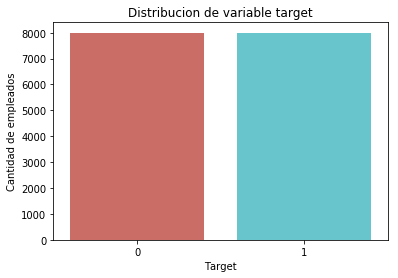

In [44]:
sns.countplot(x='left',data=os_smote_Y,palette='hls')
plt.title('Distribucion de variable target')
plt.xlabel('Target')
plt.ylabel('Cantidad de empleados')
plt.show()

## Construcción del modelo

**Aplicacion de Modelo**

In [45]:
# importar el modulo
from sklearn.linear_model import LogisticRegression

# inicializar el modelo (parametros en default)
logreg = LogisticRegression()

#usar el modelo con la data de entrenamiento
logreg.fit(os_smote_X,os_smote_Y)

#Usar modelo en el test
y_pred2=logreg.predict(smote_test_X)

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(smote_test_Y, y_pred2)
print(confusion_matrix2)

[[2547  881]
 [ 206  866]]



<img src="https://educationalresearchtechniques.files.wordpress.com/2016/08/13.png?w=415" width="300">
<center> <i>Imagen referencial matriz de confusión

Text(0.5,15,'Predicted label')

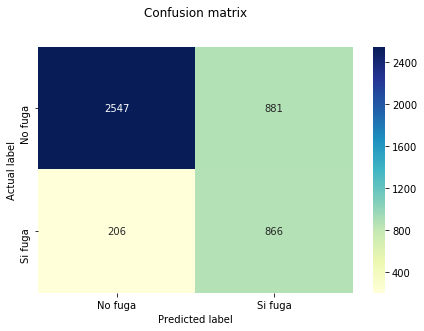

In [47]:
class_names=['No fuga','Si fuga'] # clases
# create mapa de calor
sns.heatmap(confusion_matrix2,xticklabels=class_names,yticklabels=class_names, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print("Precisión:",metrics.accuracy_score(smote_test_Y , y_pred2))
print("Especificidad:",2547/(2547+881))
#print("Especificidad:",metrics.precision_score(y_test, y_pred))
print("Sensitividad:",metrics.recall_score(smote_test_Y , y_pred2))

Precisión: 0.758444444444
Especificidad: 0.7429988331388565
Sensitividad: 0.807835820896


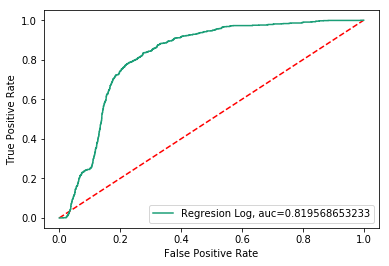

In [49]:
y_pred_proba2 = logreg.predict_proba(smote_test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(smote_test_Y ,  y_pred_proba2)
auc = metrics.roc_auc_score(smote_test_Y , y_pred_proba2)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr,tpr,label="Regresion Log, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Conclusiones:

Despues de aplicado el balanceo y estandarización se obtuvieron mejores resultados en cuanto a predicción de fuga de empleados (Se puede comprobar con la Sensitividad). Los resultados de ambas ejecuciones son los siguientes:

<b>Primera ejecución: </b> 
<br>Precisión: 0.7602222222222222
<br>Especificidad: 0.9235705950991832
<br><i>Sensitividad:</i> 0.23787313432835822<p>
    
<b>Segunda ejecución(Balanceo y estandarizacion): </b> 
<br>Precisión: 0.7584444444444445
<br>Especificidad: 0.7429988331388565
<br><i>Sensitividad:</i> 0.8078358208955224<p>